# To predict house prices:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("D:\ML_HousePrice_Project\Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape # row column

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count') # agg : aggregate the count by area type group

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# to drop unneccessary column for price prediction 

In [7]:
df2 = df1.drop(['area_type','availability','society','balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# start data cleaning process :
# to check null values

In [9]:
# df2.isnull()

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
# to handle 73 na values of bath we can fill with the median value of bath
# or as we have large number of row 13320 we can drop these 73 na rows

In [12]:
# df2.bath.median()

In [13]:
# df2['bath'] = df2.bath.fillna(df2.bath.median())

In [14]:
# bath_cl = df2.bath.fillna(df2.bath.median())

In [15]:
# df2['bath_cl'] = bath_cl

In [16]:
# df2.head()

In [17]:
# df2.drop(['bath'],axis='columns')

In [18]:
# df2.isnull().sum()

In [19]:
df3 = df2.dropna()

In [20]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df3.shape

(13246, 5)

In [22]:
df3['size'].unique() # to know the unique value in size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
# to take into accout this type of problem in dataset we create a new column as bhk using tokenising using lamda function 
# to transform usig split function to make list of string

In [24]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11320\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [25]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [27]:
df3[df3.bhk>20] # to select bedroom more than 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [28]:
# it  is show an error as it is not possible to have 43 bedroom within 2400 sqft

In [29]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
# '1133 - 1384' is not a single number so we have to convert into a single n0 by average of this two no

In [31]:
# to do this i detect the value in total_sqft column is float or not apply a functio is_float:

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
df3[df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [34]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # ~return when is_false return false (~) where it is not a valid float no of total_sqft

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [35]:
#these valuse in total_sqft column create problem so we have to clean these data
# so we create a function to make average of these range value

In [36]:
 def convert_sqft_to_num(x):
        tokens = x.split('-')
        if len(tokens) ==2:
            return (float(tokens[0])+float(tokens[1]))/2
        try:
            return float(x)
        except:
            return None

In [37]:
convert_sqft_to_num('3466')

3466.0

In [38]:
convert_sqft_to_num('4334-6478')

5406.0

In [39]:
convert_sqft_to_num('34.46Sq. Meter')

In [40]:
df4 = df3.copy() # to copy of df3

In [41]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [42]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [43]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [44]:
#almost data is cleaned

In [45]:
df5 = df4.copy()

In [46]:
# to find price per squrefoot price in lakh
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']

In [47]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [48]:
#location is a categorical feature, how many loction is availabel if there are too many location it create problem

In [49]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [50]:
len(df5.location.unique())

1304

In [51]:
# 1304 unique location that is huge usually to handel to convert these string data to dummy columns using one hot encoding
# for this high demensionality problem 
# how many data points are availabel for one location

In [52]:
df5.location = df5.location.apply(lambda x:x.strip()) # to remove leading(front) space and space of end of the location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [53]:
# to know how many location have less than 10 data point 
len(location_stats[location_stats<=10])

1052

In [54]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [55]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [56]:
len(df5.location.unique())

1293

In [57]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [58]:
len(df5.location.unique())

242

In [59]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [60]:
# now we are going to do outlair detection which represent extreme variation of dataset so we have to remove it otherthan it crteate some 
# issue using standard deviation or from domain knowledge

In [61]:
# from domain knowledge you know the threshold value of squrefoot for one bedroom suppose 300 sqft less than that is unusual

In [62]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [63]:
# so these are the outlair to remove
df5.shape

(13246, 7)

In [64]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [65]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [66]:
df6.shape

(12502, 7)

In [67]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [68]:
# some location has high price and some location has low price so what we do find mean and standard deviation then filter out 
# data point which beyond mean and sd 
# function is 

In [69]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        print(key)
        print(subdf)
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #btween -st to +st ???
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
                            
        


In [70]:
remove_pps_outliers(df6)

1st Block Jayanagar
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383  

Basavangudi
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1656   Basavangudi      3 BHK     2200.00   2.0  162.0    3     7363.636364
1857   Basavangudi      3 BHK     2337.00   4.0  292.0    3    12494.651262
2097   Basavangudi      3 BHK     2350.00   3.0  300.0    3    12765.957447
2210   Basavangudi      3 BHK     1500.00   2.0  143.0    3     9533.333333
2321   Basavangudi      3 BHK     1850.00   3.0  168.0    3     9081.081081
2479   Basavangudi  1 Bedroom      600.00   1.0   97.5    1    16250.000000
2667   Basavangudi      3 BHK     2150.00   3.0  265.0    3    12325.581395
2859   Basavangudi      2 BHK     1036.00   2.0  105.0    2    10135.135135
2931   Basavangudi  4 Bedroom     2500.00   4.0  150.0    4     6000.000000
3727   Basavangudi      4 BHK     2600.00   4.0  260.0    4    10000.000000
4183   Basavangudi      3 BHK     2300.00   3.0  317.0    3    13782.608696
4523   Basavangudi      3 BHK     1600.00   2.0  160.0    3    10000.000000


Doddathoguru
           location   size  total_sqft  bath  price  bhk  price_per_sqft
46     Doddathoguru  2 BHK       970.0   2.0  33.00    2     3402.061856
65     Doddathoguru  2 BHK      1100.0   2.0  62.00    2     5636.363636
395    Doddathoguru  2 BHK      1050.0   2.0  32.00    2     3047.619048
1396   Doddathoguru  2 BHK       850.0   2.0  25.00    2     2941.176471
1500   Doddathoguru  2 BHK      1200.0   2.0  75.00    2     6250.000000
2822   Doddathoguru  2 BHK      1030.0   2.0  42.00    2     4077.669903
2933   Doddathoguru  3 BHK      1549.0   3.0  65.00    3     4196.255649
3559   Doddathoguru  3 BHK      1875.0   3.0  55.00    3     2933.333333
3688   Doddathoguru  2 BHK       984.0   2.0  51.00    2     5182.926829
3710   Doddathoguru  1 BHK       550.0   1.0  17.00    1     3090.909091
3872   Doddathoguru  2 BHK      1015.0   2.0  33.50    2     3300.492611
3924   Doddathoguru  2 BHK      1104.0   2.0  39.00    2     3532.608696
4166   Doddathoguru  2 BHK       915.0

13014  Hegde Nagar      3 BHK     1348.00   2.0   80.50    3     5971.810089
Hennur
      location       size  total_sqft  bath    price  bhk  price_per_sqft
364     Hennur      2 BHK      1075.0   2.0   52.000    2     4837.209302
1133    Hennur      2 BHK      1255.0   2.0   52.320    2     4168.924303
1793    Hennur      2 BHK      1225.0   2.0   57.000    2     4653.061224
2246    Hennur      2 BHK      1255.0   2.0   57.500    2     4581.673307
2443    Hennur      2 BHK      1259.0   2.0   57.000    2     4527.402701
2715    Hennur      2 BHK      1255.0   2.0   53.500    2     4262.948207
2732    Hennur      2 BHK      1285.0   2.0   60.000    2     4669.260700
3022    Hennur      2 BHK      1285.0   2.0   60.000    2     4669.260700
3326    Hennur      2 BHK      1100.0   2.0   60.000    2     5454.545455
3474    Hennur      2 BHK      1231.0   2.0   48.000    2     3899.268887
3517    Hennur      2 BHK      1255.0   2.0   58.000    2     4621.513944
4120    Hennur      2 BHK   

Kannamangala
           location       size  total_sqft  bath   price  bhk  price_per_sqft
151    Kannamangala      2 BHK       957.0   2.0   58.00    2     6060.606061
1276   Kannamangala      2 BHK       957.0   2.0   56.00    2     5851.619645
1380   Kannamangala      3 BHK      1550.0   3.0   65.00    3     4193.548387
2309   Kannamangala  4 Bedroom      3000.0   4.0  200.00    4     6666.666667
2550   Kannamangala      2 BHK      1235.0   2.0   43.63    2     3532.793522
2601   Kannamangala      3 BHK      1536.0   3.0   89.00    3     5794.270833
3574   Kannamangala      2 BHK      1262.0   2.0   55.00    2     4358.161648
3639   Kannamangala  4 Bedroom      2400.0   4.0  130.00    4     5416.666667
3968   Kannamangala      3 BHK      1574.0   3.0   93.34    3     5930.114358
6487   Kannamangala      2 BHK       957.0   2.0   52.50    2     5485.893417
8262   Kannamangala      3 BHK      1536.0   3.0  104.00    3     6770.833333
8526   Kannamangala      2 BHK       957.0   2.0   

Munnekollal
          location        size  total_sqft  bath   price  bhk  price_per_sqft
318    Munnekollal       2 BHK      1170.0   2.0   52.00    2     4444.444444
551    Munnekollal       2 BHK      1102.0   2.0   53.67    2     4870.235935
1610   Munnekollal       3 BHK      1390.0   3.0   68.00    3     4892.086331
2653   Munnekollal       2 BHK      1200.0   2.0   49.50    2     4125.000000
2689   Munnekollal       2 BHK       950.0   2.0   46.50    2     4894.736842
3476   Munnekollal       3 BHK      1560.0   3.0   75.00    3     4807.692308
5959   Munnekollal       2 BHK      1210.0   2.0   75.00    2     6198.347107
6844   Munnekollal       3 BHK      1750.0   3.0   86.50    3     4942.857143
7196   Munnekollal       3 BHK      1385.0   2.0   66.50    3     4801.444043
7393   Munnekollal       2 BHK      1080.0   2.0   45.00    2     4166.666667
8718   Munnekollal       2 BHK      1170.0   2.0   59.00    2     5042.735043
9797   Munnekollal       3 BHK      1222.0   3.0   9

Sarjapur  Road
             location       size  total_sqft  bath   price  bhk  \
41     Sarjapur  Road      3 BHK      1254.0   3.0   38.00    3   
115    Sarjapur  Road  3 Bedroom      2497.0   3.0  140.00    3   
219    Sarjapur  Road      3 BHK      1787.0   3.0   98.29    3   
220    Sarjapur  Road      3 BHK      1787.0   3.0  125.00    3   
223    Sarjapur  Road      2 BHK       984.0   2.0   44.28    2   
...               ...        ...         ...   ...     ...  ...   
13246  Sarjapur  Road  4 Bedroom      2758.0   4.0  240.00    4   
13248  Sarjapur  Road      2 BHK      1132.0   2.0   70.00    2   
13263  Sarjapur  Road      3 BHK      1380.0   2.0   55.00    3   
13290  Sarjapur  Road      4 BHK      4050.0   2.0  450.00    4   
13293  Sarjapur  Road      4 BHK      2425.0   5.0  195.00    4   

       price_per_sqft  
41        3030.303030  
115       5606.728074  
219       5500.279799  
220       6994.963626  
223       4500.000000  
...               ...  
13246     87

Yeshwanthpur
           location   size  total_sqft  bath   price  bhk  price_per_sqft
100    Yeshwanthpur  3 BHK      2502.0   3.0  138.00    3     5515.587530
392    Yeshwanthpur  3 BHK      1693.0   3.0  108.00    3     6379.208506
763    Yeshwanthpur  1 BHK       667.0   1.0   36.85    1     5524.737631
825    Yeshwanthpur  4 BHK      1950.0   4.0  130.00    4     6666.666667
867    Yeshwanthpur  2 BHK      1170.0   2.0   57.00    2     4871.794872
...             ...    ...         ...   ...     ...  ...             ...
12627  Yeshwanthpur  3 BHK      1676.0   3.0   92.13    3     5497.016706
12850  Yeshwanthpur  3 BHK      2503.0   3.0  138.00    3     5513.383939
13017  Yeshwanthpur  3 BHK      1855.0   3.0  135.00    3     7277.628032
13124  Yeshwanthpur  3 BHK      1876.0   3.0  160.00    3     8528.784648
13309  Yeshwanthpur  3 BHK      1675.0   3.0   92.13    3     5500.298507

[80 rows x 7 columns]
other
      location       size  total_sqft  bath   price  bhk  price_per_sq

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [71]:
df7 = remove_pps_outliers(df6)

1st Block Jayanagar
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383  

Balagere
       location   size  total_sqft  bath   price  bhk  price_per_sqft
276    Balagere  2 BHK     1210.00   2.0  80.900    2     6685.950413
369    Balagere  2 BHK     1380.00   2.0  60.000    2     4347.826087
426    Balagere  3 BHK     1590.00   3.0  79.000    3     4968.553459
1316   Balagere  2 BHK     1210.00   2.0  72.000    2     5950.413223
1629   Balagere  2 BHK     1205.00   2.0  78.500    2     6514.522822
2323   Balagere  2 BHK     1028.00   2.0  31.860    2     3099.221790
2396   Balagere  1 BHK      790.50   1.0  41.900    1     5300.442758
2524   Balagere  2 BHK     1145.00   2.0  65.000    2     5676.855895
2738   Balagere  2 BHK     1012.00   2.0  54.590    2     5394.268775
3166   Balagere  2 BHK     1012.00   2.0  75.000    2     7411.067194
3350   Balagere  2 BHK     1020.07   2.0  68.380    2     6703.461527
3533   Balagere  2 BHK     1205.47   2.0  81.000    2     6719.370868
4107   Balagere  2 BHK     1007.00   2.0  65.000    2     6454.816286
4312   Bala

[151 rows x 7 columns]
Basavangudi
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1656   Basavangudi      3 BHK     2200.00   2.0  162.0    3     7363.636364
1857   Basavangudi      3 BHK     2337.00   4.0  292.0    3    12494.651262
2097   Basavangudi      3 BHK     2350.00   3.0  300.0    3    12765.957447
2210   Basavangudi      3 BHK     1500.00   2.0  143.0    3     9533.333333
2321   Basavangudi      3 BHK     1850.00   3.0  168.0    3     9081.081081
2479   Basavangudi  1 Bedroom      600.00   1.0   97.5    1    16250.000000
2667   Basavangudi      3 BHK     2150.00   3.0  265.0    3    12325.581395
2859   Basavangudi      2 BHK     1036.00   2.0  105.0    2    10135.135135
2931   Basavangudi  4 Bedroom     2500.00   4.0  150.0    4     6000.000000
3727   Basavangudi      4 BHK     2600.00   4.0  260.0    4    10000.000000
4183   Basavangudi      3 BHK     2300.00   3.0  317.0    3    13782.608696
4523   Basavangudi      3 BHK     1600.00   2.0  160.

13136     3789.473684  
Choodasandra
           location       size  total_sqft  bath   price  bhk  price_per_sqft
1126   Choodasandra      2 BHK      1115.0   2.0   50.00    2     4484.304933
1729   Choodasandra      2 BHK      1300.0   2.0   57.00    2     4384.615385
3959   Choodasandra      3 BHK      1530.0   3.0   77.00    3     5032.679739
4755   Choodasandra      3 BHK      1220.0   3.0   56.00    3     4590.163934
4849   Choodasandra      3 BHK      1220.0   3.0   56.00    3     4590.163934
4862   Choodasandra      2 BHK      1197.0   2.0   63.00    2     5263.157895
4999   Choodasandra  3 Bedroom       900.0   4.0  155.00    3    17222.222222
5825   Choodasandra      3 BHK      1465.0   3.0   75.00    3     5119.453925
6520   Choodasandra      2 BHK      1115.0   2.0   50.00    2     4484.304933
6551   Choodasandra      2 BHK      1215.0   2.0   59.00    2     4855.967078
6955   Choodasandra      3 BHK      1254.0   2.0   65.00    3     5183.413078
7339   Choodasandra      3 

Doddaballapur
            location       size  total_sqft  bath  price  bhk  price_per_sqft
2120   Doddaballapur      4 BHK      1690.0   3.0   80.0    4     4733.727811
2680   Doddaballapur  3 Bedroom      3000.0   2.0  120.0    3     4000.000000
3357   Doddaballapur  4 Bedroom      4200.0   4.0  325.0    4     7738.095238
3996   Doddaballapur  3 Bedroom      3876.0   3.0  300.0    3     7739.938080
4039   Doddaballapur  3 Bedroom      2776.0   4.0  195.0    3     7024.495677
7520   Doddaballapur      3 BHK         NaN   2.0   48.0    3             NaN
8653   Doddaballapur  2 Bedroom       640.0   1.0   10.5    2     1640.625000
9764   Doddaballapur  3 Bedroom      2400.0   3.0  250.0    3    10416.666667
10310  Doddaballapur  3 Bedroom      2440.0   3.0  142.0    3     5819.672131
11966  Doddaballapur  4 Bedroom      2400.0   3.0  200.0    4     8333.333333
12364  Doddaballapur      1 BHK       654.0   1.0   49.0    1     7492.354740
12438  Doddaballapur  4 Bedroom      3206.0   5.0 

Hennur Road
          location       size  total_sqft  bath   price  bhk  price_per_sqft
74     Hennur Road      3 BHK      2089.0   3.0  140.00    3     6701.771182
140    Hennur Road  8 Bedroom      5000.0   8.0  250.00    8     5000.000000
267    Hennur Road      3 BHK      1866.0   2.0   61.58    3     3300.107181
320    Hennur Road      2 BHK      1385.0   2.0   83.09    2     5999.277978
549    Hennur Road      2 BHK      1317.5   2.0   63.77    2     4840.227704
...            ...        ...         ...   ...     ...  ...             ...
12578  Hennur Road      2 BHK      1165.0   2.0   52.00    2     4463.519313
12662  Hennur Road      2 BHK      1052.0   2.0   34.72    2     3300.380228
12670  Hennur Road      2 BHK      1450.0   2.0   80.00    2     5517.241379
12891  Hennur Road      2 BHK      1155.0   2.0   69.18    2     5989.610390
13030  Hennur Road      3 BHK      1936.0   3.0  131.00    3     6766.528926

[149 rows x 7 columns]
Hoodi
      location       size  total_s

ISRO Layout
          location       size  total_sqft  bath  price  bhk  price_per_sqft
79     ISRO Layout  6 Bedroom      4400.0   6.0  250.0    6     5681.818182
93     ISRO Layout  4 Bedroom      1200.0   4.0  155.0    4    12916.666667
143    ISRO Layout      2 BHK      1000.0   2.0   60.0    2     6000.000000
3019   ISRO Layout      2 BHK      1180.0   2.0   52.0    2     4406.779661
4817   ISRO Layout      2 BHK      1000.0   2.0   60.0    2     6000.000000
5554   ISRO Layout      3 BHK      1310.0   2.0   68.0    3     5190.839695
8757   ISRO Layout  4 Bedroom      4200.0   4.0  255.0    4     6071.428571
9516   ISRO Layout      2 BHK      1050.0   2.0   51.0    2     4857.142857
10473  ISRO Layout      3 BHK      1370.0   2.0   87.0    3     6350.364964
11167  ISRO Layout      2 BHK      1200.0   2.0   43.0    2     3583.333333
ITPL
      location       size  total_sqft  bath   price  bhk  price_per_sqft
997       ITPL  3 Bedroom      1200.0   3.0   56.12    3     4676.666667
1

Kaval Byrasandra
               location       size  total_sqft  bath  price  bhk  \
328    Kaval Byrasandra      2 BHK      1200.0   2.0   52.0    2   
733    Kaval Byrasandra      2 BHK      1020.0   2.0   52.0    2   
2477   Kaval Byrasandra      2 BHK      1200.0   2.0   49.5    2   
2656   Kaval Byrasandra      2 BHK       945.0   2.0   50.0    2   
3011   Kaval Byrasandra      2 BHK      1060.0   2.0   45.0    2   
3363   Kaval Byrasandra      3 BHK      2400.0   2.0   50.0    3   
3892   Kaval Byrasandra      2 BHK      1100.0   2.0   46.0    2   
4467   Kaval Byrasandra      2 BHK      1185.0   2.0   49.0    2   
4815   Kaval Byrasandra      2 BHK       997.0   2.0   53.0    2   
5308   Kaval Byrasandra      2 BHK      1060.0   2.0   42.0    2   
6714   Kaval Byrasandra      1 BHK       480.0   1.0   25.0    1   
8446   Kaval Byrasandra      2 BHK      1125.0   2.0   41.5    2   
8644   Kaval Byrasandra      2 BHK      1180.0   2.0   60.0    2   
9623   Kaval Byrasandra      3 

Kogilu
      location        size  total_sqft  bath   price  bhk  price_per_sqft
206     Kogilu       3 BHK      1909.0   3.0   88.00    3     4609.743321
274     Kogilu       3 BHK      1664.0   2.0   73.95    3     4444.110577
1213    Kogilu       2 BHK      1170.0   2.0   51.99    2     4443.589744
1431    Kogilu   2 Bedroom       650.0   2.0   28.00    2     4307.692308
1861    Kogilu       2 BHK      1140.0   2.0   50.66    2     4443.859649
1957    Kogilu       2 BHK      1200.0   2.0   53.33    2     4444.166667
2250    Kogilu       3 BHK      1934.0   3.0  150.00    3     7755.946225
2297    Kogilu   1 Bedroom       540.0   1.0   36.00    1     6666.666667
3193    Kogilu       3 BHK      2350.0   5.0  327.00    3    13914.893617
3928    Kogilu       3 BHK      1559.0   3.0  127.00    3     8146.247595
3963    Kogilu       2 BHK      1190.0   2.0   50.66    2     4257.142857
4621    Kogilu       2 BHK      1140.0   2.0   50.66    2     4443.859649
5191    Kogilu       3 BHK     

Nagavara
       location       size  total_sqft  bath   price  bhk  price_per_sqft
177    Nagavara  1 Bedroom      400.00   1.0   14.00    1     3500.000000
1976   Nagavara      4 BHK     2172.65   3.0  120.00    4     5523.208984
2303   Nagavara      2 BHK     2200.00   2.0   55.00    2     2500.000000
2512   Nagavara      3 BHK     1545.00   2.0   58.00    3     3754.045307
2599   Nagavara      3 BHK     2319.00   3.0  180.00    3     7761.966365
3104   Nagavara      3 BHK     2430.00   4.0  180.00    3     7407.407407
6720   Nagavara      2 BHK      936.00   2.0   40.20    2     4294.871795
7530   Nagavara      2 BHK     1125.00   2.0   44.50    2     3955.555556
7714   Nagavara      3 BHK     2400.00   3.0  251.00    3    10458.333333
7943   Nagavara      2 BHK     1315.00   2.0   70.00    2     5323.193916
8479   Nagavara      2 BHK     1077.00   2.0   50.00    2     4642.525534
8678   Nagavara      4 BHK     2496.00   4.0  125.00    4     5008.012821
9893   Nagavara      2 BHK   

Old Madras Road
              location   size  total_sqft  bath   price  bhk  price_per_sqft
285    Old Madras Road  3 BHK      1425.0   2.0   94.00    3     6596.491228
490    Old Madras Road  5 BHK      4500.0   7.0  337.00    5     7488.888889
1079   Old Madras Road  3 BHK      1350.0   3.0   54.54    3     4040.000000
1362   Old Madras Road  2 BHK       935.0   2.0   32.72    2     3499.465241
1683   Old Madras Road  4 BHK      3715.0   6.0  224.50    4     6043.068641
...                ...    ...         ...   ...     ...  ...             ...
12297  Old Madras Road  2 BHK      1165.0   2.0   52.00    2     4463.519313
12527  Old Madras Road  2 BHK      2640.0   2.0  170.00    2     6439.393939
12845  Old Madras Road  2 BHK      1165.0   2.0   51.42    2     4413.733906
13108  Old Madras Road  2 BHK       935.0   2.0   32.72    2     3499.465241
13253  Old Madras Road  2 BHK      1211.0   2.0   45.00    2     3715.937242

[70 rows x 7 columns]
Padmanabhanagar
              locatio

Somasundara Palya
                location   size  total_sqft  bath  price  bhk  price_per_sqft
338    Somasundara Palya  3 BHK      1600.0   3.0   64.0    3     4000.000000
998    Somasundara Palya  2 BHK      1255.0   2.0   67.0    2     5338.645418
2482   Somasundara Palya  2 BHK      1448.0   2.0   68.0    2     4696.132597
2961   Somasundara Palya  3 BHK      1570.0   3.0   68.0    3     4331.210191
3127   Somasundara Palya  2 BHK      1178.0   2.0   73.0    2     6196.943973
3141   Somasundara Palya  2 BHK      1260.0   2.0   60.0    2     4761.904762
3475   Somasundara Palya  2 BHK      1174.0   2.0   74.0    2     6303.236797
3712   Somasundara Palya  2 BHK      1033.0   2.0   48.0    2     4646.660213
3768   Somasundara Palya  3 BHK      1575.0   3.0   63.1    3     4006.349206
3990   Somasundara Palya  2 BHK      1329.0   2.0   70.0    2     5267.118134
4111   Somasundara Palya  3 BHK      2372.0   3.0  140.0    3     5902.192243
4164   Somasundara Palya  2 BHK      1178.0   

In [72]:
df7.shape

(10241, 7)

In [73]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
#     plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
#     plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("total squre feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()

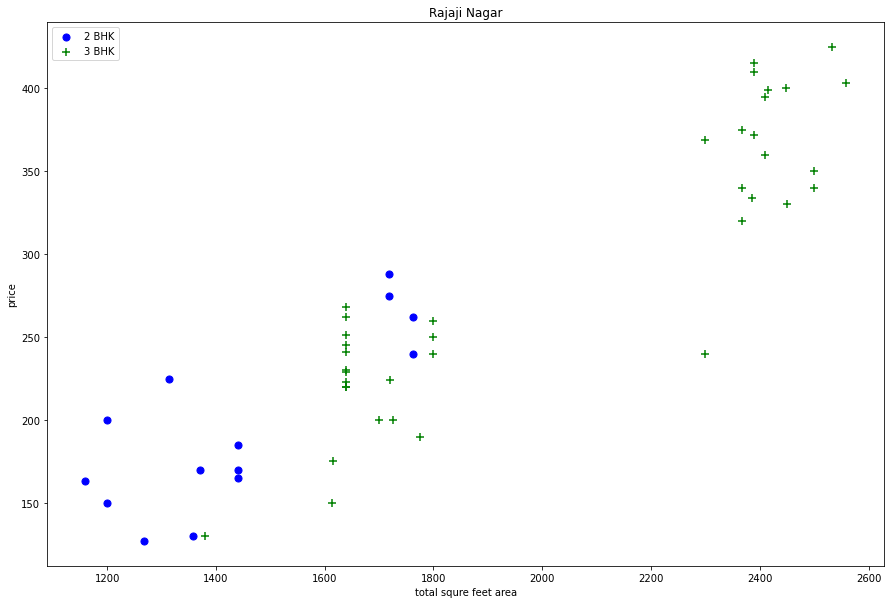

In [74]:
plot_scatter_chart(df7,"Rajaji Nagar")

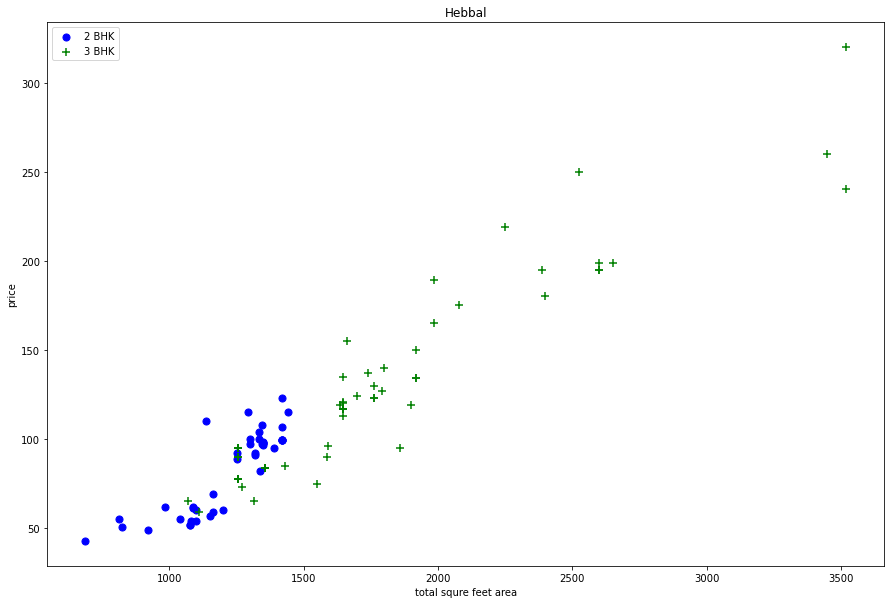

In [75]:
plot_scatter_chart(df7,"Hebbal")

In [76]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        print("A",location,location_df)
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            print("B",bhk, bhk_df)
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
                
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            print("C",bhk, bhk_df)
            stats = bhk_stats.get(bhk-1)
            print("D",stats)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [77]:
df8 = remove_bhk_outliers(df7)

A 1st Block Jayanagar               location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
B 2               location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
B 3               location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    

44  5th Block Hbr Layout  2 BHK      1100.0   2.0   48.0    2     4363.636364
B 3                 location   size  total_sqft  bath  price  bhk  price_per_sqft
42  5th Block Hbr Layout  3 BHK      1270.0   2.0   70.0    3     5511.811024
B 5                 location       size  total_sqft  bath  price  bhk  \
45  5th Block Hbr Layout  5 Bedroom      3600.0   5.0  130.0    5   

    price_per_sqft  
45     3611.111111  
B 6                 location   size  total_sqft  bath  price  bhk  price_per_sqft
46  5th Block Hbr Layout  6 BHK      5100.0   5.0  300.0    6     5882.352941
C 2                 location   size  total_sqft  bath  price  bhk  price_per_sqft
41  5th Block Hbr Layout  2 BHK      1206.0   2.0   56.0    2     4643.449420
43  5th Block Hbr Layout  2 BHK      1312.0   2.0   69.0    2     5259.146341
44  5th Block Hbr Layout  2 BHK      1100.0   2.0   48.0    2     4363.636364
D None
C 3                 location   size  total_sqft  bath  price  bhk  price_per_sqft
42  5th Bloc

237     3666.666667  
B 4                location       size  total_sqft  bath  price  bhk  \
200  8th Phase JP Nagar  4 Bedroom      2700.0   4.0  130.0    4   
208  8th Phase JP Nagar      4 BHK      2100.0   4.0   92.0    4   
219  8th Phase JP Nagar  4 Bedroom      2600.0   4.0  115.0    4   

     price_per_sqft  
200     4814.814815  
208     4380.952381  
219     4423.076923  
B 5                location       size  total_sqft  bath  price  bhk  \
231  8th Phase JP Nagar  5 Bedroom      1730.0   5.0   75.0    5   

     price_per_sqft  
231     4335.260116  
C 1                location   size  total_sqft  bath  price  bhk  price_per_sqft
192  8th Phase JP Nagar  1 BHK       451.0   1.0   29.9    1     6629.711752
206  8th Phase JP Nagar  1 BHK       500.0   1.0   31.0    1     6200.000000
213  8th Phase JP Nagar  1 BHK       500.0   1.0   30.0    1     6000.000000
226  8th Phase JP Nagar  1 BHK       500.0   1.0   33.0    1     6600.000000
D None
C 2                location   si

344  Akshaya Nagar  2 BHK       900.0   2.0   45.0    2     5000.000000
D None
C 3           location       size  total_sqft  bath  price  bhk  price_per_sqft
301  Akshaya Nagar      3 BHK      1662.0   3.0   85.1    3     5120.336943
302  Akshaya Nagar      3 BHK      1897.0   3.0  120.0    3     6325.777543
303  Akshaya Nagar      3 BHK      1410.0   2.0   75.0    3     5319.148936
304  Akshaya Nagar      3 BHK      1360.0   2.0   85.0    3     6250.000000
305  Akshaya Nagar      3 BHK      1600.0   2.0   65.0    3     4062.500000
306  Akshaya Nagar      3 BHK      1410.0   2.0   80.0    3     5673.758865
307  Akshaya Nagar      3 BHK      1662.0   3.0   85.0    3     5114.320096
308  Akshaya Nagar      3 BHK      1662.0   3.0   85.5    3     5144.404332
310  Akshaya Nagar      3 BHK      1666.0   3.0   95.0    3     5702.280912
311  Akshaya Nagar      3 BHK      1575.0   3.0   90.0    3     5714.285714
312  Akshaya Nagar      3 BHK      1430.0   2.0   75.0    3     5244.755245
313  

489   Anekal      2 BHK       625.0   1.0   25.0    2     4000.000000
B 3     location       size  total_sqft  bath  price  bhk  price_per_sqft
463   Anekal  3 Bedroom      1800.0   3.0   68.0    3     3777.777778
473   Anekal      3 BHK       967.0   2.0   45.0    3     4653.567735
475   Anekal      3 BHK      1150.0   3.0   45.0    3     3913.043478
482   Anekal  3 Bedroom      2400.0   4.0   95.0    3     3958.333333
B 4     location       size  total_sqft  bath  price  bhk  price_per_sqft
471   Anekal  4 Bedroom      1200.0   2.0   36.0    4          3000.0
C 1     location   size  total_sqft  bath  price  bhk  price_per_sqft
460   Anekal  1 BHK       600.0   1.0   16.5    1     2750.000000
462   Anekal  1 BHK       530.0   1.0   18.0    1     3396.226415
465   Anekal   1 RK       351.0   1.0   16.0    1     4558.404558
478   Anekal  1 BHK       400.0   1.0   11.5    1     2875.000000
479   Anekal  1 BHK       456.0   1.0   15.0    1     3289.473684
486   Anekal  1 BHK       420.0 

579  BEML Layout      2 BHK      1194.0   2.0   65.0    2     5443.886097
D None
C 3         location   size  total_sqft  bath  price  bhk  price_per_sqft
570  BEML Layout  3 BHK      2000.0   3.0   85.0    3          4250.0
573  BEML Layout  3 BHK      2000.0   2.0   85.0    3          4250.0
577  BEML Layout  3 BHK      2000.0   3.0   85.0    3          4250.0
578  BEML Layout  3 BHK      2000.0   3.0   85.0    3          4250.0
D {'mean': 5944.048212904286, 'std': 1628.8084083258766, 'count': 6}
C 5         location       size  total_sqft  bath  price  bhk  price_per_sqft
572  BEML Layout  5 Bedroom      2400.0   4.0  225.0    5          9375.0
D None
A BTM 2nd Stage           location       size  total_sqft  bath  price  bhk  price_per_sqft
580  BTM 2nd Stage  3 Bedroom      1260.0   5.0  185.0    3    14682.539683
581  BTM 2nd Stage      2 BHK       950.0   2.0   52.0    2     5473.684211
582  BTM 2nd Stage      3 BHK      1850.0   3.0  170.0    3     9189.189189
583  BTM 2nd Stag

741  Banashankari  2 BHK      1260.0   2.0  75.00    2     5952.380952
D {'mean': 8333.333333333334, 'std': 0.0, 'count': 2}
C 3          location   size  total_sqft  bath   price  bhk  price_per_sqft
684  Banashankari  3 BHK      1200.0   2.0   42.00    3     3500.000000
686  Banashankari  3 BHK      1470.0   2.0   88.64    3     6029.931973
687  Banashankari  3 BHK      1300.0   2.0   75.00    3     5769.230769
688  Banashankari  3 BHK      1800.0   3.0  115.00    3     6388.888889
690  Banashankari  3 BHK      1340.0   2.0   53.60    3     4000.000000
692  Banashankari  3 BHK      2600.0   4.0  135.00    3     5192.307692
693  Banashankari  3 BHK      1900.0   2.0  170.00    3     8947.368421
697  Banashankari  3 BHK      1350.0   2.0   83.00    3     6148.148148
698  Banashankari  3 BHK      1425.0   3.0   49.88    3     3500.350877
700  Banashankari  3 BHK      1400.0   2.0   78.00    3     5571.428571
701  Banashankari  3 BHK      1700.0   3.0  125.00    3     7352.941176
711  Ba

812  Banjara Layout  3 Bedroom      2500.0   4.0  140.0    3          5600.0
D {'mean': 6635.496110794916, 'std': 905.9365352849989, 'count': 3}
A Bannerghatta          location   size  total_sqft  bath  price  bhk  price_per_sqft
813  Bannerghatta  4 BHK      3012.0   6.0  250.0    4     8300.132802
814  Bannerghatta  3 BHK      1665.0   3.0  110.0    3     6606.606607
815  Bannerghatta  3 BHK      2370.0   4.0  195.0    3     8227.848101
816  Bannerghatta  2 BHK      1100.0   2.0   66.0    2     6000.000000
817  Bannerghatta  2 BHK      1113.0   2.0   70.0    2     6289.308176
818  Bannerghatta  2 BHK      1200.0   2.0   73.2    2     6100.000000
819  Bannerghatta  2 BHK      1070.0   2.0   87.0    2     8130.841121
820  Bannerghatta  3 BHK      1776.0   3.0  124.0    3     6981.981982
821  Bannerghatta  3 BHK      1776.0   3.0  150.0    3     8445.945946
B 2          location   size  total_sqft  bath  price  bhk  price_per_sqft
816  Bannerghatta  2 BHK      1100.0   2.0   66.0    2 

1011    Begur  4 BHK      1664.0   4.0   65.0    4         3906.25
D {'mean': 4510.654979278204, 'std': 599.1143016556773, 'count': 9}
A Begur Road         location   size  total_sqft  bath  price  bhk  price_per_sqft
1024  Begur Road  2 BHK      1200.0   2.0  44.00    2     3666.666667
1025  Begur Road  2 BHK      1200.0   2.0  46.80    2     3900.000000
1026  Begur Road  2 BHK      1160.0   2.0  44.00    2     3793.103448
1027  Begur Road  3 BHK      1584.0   3.0  65.00    3     4103.535354
1028  Begur Road  3 BHK      1500.0   2.0  54.00    3     3600.000000
...          ...    ...         ...   ...    ...  ...             ...
1083  Begur Road  2 BHK      1160.0   2.0  36.54    2     3150.000000
1084  Begur Road  2 BHK      1215.0   2.0  43.75    2     3600.823045
1085  Begur Road  2 BHK      1200.0   2.0  44.73    2     3727.500000
1086  Begur Road  2 BHK      1160.0   2.0  42.00    2     3620.689655
1087  Begur Road  3 BHK      1410.0   2.0  54.99    3     3900.000000

[64 rows x 

B 2           location   size  total_sqft  bath   price  bhk  price_per_sqft
1230  Billekahalli  2 BHK      1125.0   2.0   62.00    2     5511.111111
1232  Billekahalli  2 BHK      1090.0   2.0   52.00    2     4770.642202
1233  Billekahalli  2 BHK      1112.0   2.0   62.00    2     5575.539568
1236  Billekahalli  2 BHK       950.0   2.0   58.11    2     6116.842105
1237  Billekahalli  2 BHK      1360.0   2.0  110.00    2     8088.235294
1238  Billekahalli  2 BHK      1125.0   2.0   65.00    2     5777.777778
1239  Billekahalli  2 BHK       950.0   2.0   56.00    2     5894.736842
B 3           location       size  total_sqft  bath  price  bhk  price_per_sqft
1229  Billekahalli      3 BHK      1935.0   3.0  110.0    3     5684.754522
1231  Billekahalli      3 BHK      1650.0   3.0   88.0    3     5333.333333
1234  Billekahalli  3 Bedroom      2400.0   3.0  150.0    3     6250.000000
1235  Billekahalli      3 BHK      2968.0   3.0  225.0    3     7580.862534
1240  Billekahalli      3 BH

1408  Brookefield      3 BHK      1594.0   3.0  140.0    3     8782.936010
B 2          location   size  total_sqft  bath  price  bhk  price_per_sqft
1369  Brookefield  2 BHK      1150.0   2.0   69.0    2     6000.000000
1370  Brookefield  2 BHK      1142.0   2.0   70.0    2     6129.597198
1377  Brookefield  2 BHK      1262.0   2.0   75.0    2     5942.947702
1378  Brookefield  2 BHK      1139.0   2.0   80.0    2     7023.705004
1379  Brookefield  2 BHK      1125.0   2.0   70.0    2     6222.222222
1382  Brookefield  2 BHK       941.0   2.0   48.0    2     5100.956429
1385  Brookefield  2 BHK      1100.0   2.0   55.0    2     5000.000000
1387  Brookefield  2 BHK      1225.0   2.0   66.5    2     5428.571429
1389  Brookefield  2 BHK      1080.0   2.0   50.0    2     4629.629630
1390  Brookefield  2 BHK      1230.0   2.0   55.0    2     4471.544715
1391  Brookefield  2 BHK      1200.0   2.0   75.0    2     6250.000000
1392  Brookefield  2 BHK      1089.0   2.0   49.0    2     4499.54086

C 3         location   size  total_sqft  bath  price  bhk  price_per_sqft
1502  Chandapura  3 BHK     1208.00   3.0  45.00    3     3725.165563
1503  Chandapura  3 BHK     1190.00   2.0  30.35    3     2550.420168
1508  Chandapura  3 BHK     1305.00   3.0  33.28    3     2550.191571
1509  Chandapura  3 BHK     1065.00   2.0  33.00    3     3098.591549
1516  Chandapura  3 BHK     1185.00   2.0  30.22    3     2550.210970
1518  Chandapura  3 BHK     1107.00   2.0  43.00    3     3884.372177
1527  Chandapura  3 BHK     1190.00   2.0  30.35    3     2550.420168
1528  Chandapura  3 BHK     1095.00   2.0  32.00    3     2922.374429
1529  Chandapura  3 BHK     1208.51   3.0  42.00    3     3475.353948
1532  Chandapura  3 BHK     1505.00   2.0  42.00    3     2790.697674
1540  Chandapura  3 BHK     1230.00   2.0  31.37    3     2550.406504
1545  Chandapura  3 BHK     1110.00   2.0  29.97    3     2700.000000
1547  Chandapura  3 BHK     1225.00   3.0  33.08    3     2700.408163
1548  Chandapura

C 3         location       size  total_sqft  bath  price  bhk  price_per_sqft
1684  Cooke Town      3 BHK      2388.0   4.0  239.0    3    10008.375209
1688  Cooke Town      3 BHK      2560.0   4.0  310.0    3    12109.375000
1689  Cooke Town  3 Bedroom      2600.0   3.0  375.0    3    14423.076923
1691  Cooke Town      3 BHK      2300.0   3.0  250.0    3    10869.565217
D {'mean': 9450.335685771604, 'std': 1592.310446826406, 'count': 3}
C 4         location   size  total_sqft  bath  price  bhk  price_per_sqft
1683  Cooke Town  4 BHK      3950.0   4.0  450.0    4    11392.405063
1687  Cooke Town  4 BHK      3900.0   5.0  415.0    4    10641.025641
D {'mean': 11852.598087462115, 'std': 1661.385526814624, 'count': 4}
A Cox Town       location   size  total_sqft  bath  price  bhk  price_per_sqft
1692  Cox Town  3 BHK      1975.0   3.0  150.0    3     7594.936709
1693  Cox Town  3 BHK      1650.0   3.0  100.0    3     6060.606061
1694  Cox Town  3 BHK      1730.0   3.0  140.0    3     8092

1806  Doddaballapur  3 Bedroom      2440.0   3.0  142.0    3     5819.672131
B 4            location       size  total_sqft  bath  price  bhk  price_per_sqft
1802  Doddaballapur      4 BHK      1690.0   3.0   80.0    4     4733.727811
1803  Doddaballapur  4 Bedroom      4200.0   4.0  325.0    4     7738.095238
1807  Doddaballapur  4 Bedroom      2400.0   3.0  200.0    4     8333.333333
1809  Doddaballapur  4 Bedroom      3206.0   5.0  270.0    4     8421.709295
C 1            location   size  total_sqft  bath  price  bhk  price_per_sqft
1808  Doddaballapur  1 BHK       654.0   1.0   49.0    1      7492.35474
D None
C 3            location       size  total_sqft  bath  price  bhk  price_per_sqft
1804  Doddaballapur  3 Bedroom      3876.0   3.0  300.0    3     7739.938080
1805  Doddaballapur  3 Bedroom      2776.0   4.0  195.0    3     7024.495677
1806  Doddaballapur  3 Bedroom      2440.0   3.0  142.0    3     5819.672131
D None
C 4            location       size  total_sqft  bath  pric

B 4              location       size  total_sqft  bath  price  bhk  price_per_sqft
1929  Electronic City  4 Bedroom      2000.0   4.0  120.0    4     6000.000000
1951  Electronic City  4 Bedroom      4000.0   5.0  150.0    4     3750.000000
2023  Electronic City      4 BHK      2435.0   4.0  119.0    4     4887.063655
2038  Electronic City      4 BHK      2093.0   4.0  104.0    4     4968.944099
2168  Electronic City      4 BHK      2093.0   4.0  134.0    4     6402.293359
C 1              location   size  total_sqft  bath  price  bhk  price_per_sqft
1905  Electronic City  1 BHK       589.0   1.0  27.00    1     4584.040747
1911  Electronic City  1 BHK       630.0   1.0  34.65    1     5500.000000
1964  Electronic City  1 BHK       700.0   1.0  35.00    1     5000.000000
1993  Electronic City   1 RK       435.0   1.0  19.50    1     4482.758621
2000  Electronic City  1 BHK       550.0   1.0  12.00    1     2181.818182
2041  Electronic City  1 BHK       435.0   1.0  21.00    1     4827.

B 3         location       size  total_sqft  bath  price  bhk  price_per_sqft
2404  Giri Nagar  3 Bedroom      1800.0   3.0  252.0    3    14000.000000
2405  Giri Nagar  3 Bedroom      1350.0   3.0  240.0    3    17777.777778
B 4         location       size  total_sqft  bath  price  bhk  price_per_sqft
2403  Giri Nagar  4 Bedroom      2400.0   4.0  400.0    4    16666.666667
2406  Giri Nagar  4 Bedroom      2400.0   4.0  400.0    4    16666.666667
2409  Giri Nagar  4 Bedroom      4000.0   3.0  750.0    4    18750.000000
B 6         location       size  total_sqft  bath  price  bhk  price_per_sqft
2407  Giri Nagar  6 Bedroom      3000.0   4.0  375.0    6    12500.000000
2408  Giri Nagar  6 Bedroom      2400.0   6.0  400.0    6    16666.666667
C 3         location       size  total_sqft  bath  price  bhk  price_per_sqft
2404  Giri Nagar  3 Bedroom      1800.0   3.0  252.0    3    14000.000000
2405  Giri Nagar  3 Bedroom      1350.0   3.0  240.0    3    17777.777778
D None
C 4         loc

C 3      location   size  total_sqft  bath  price  bhk  price_per_sqft
2501   Gunjur  3 BHK      1356.0   2.0  66.00    3     4867.256637
2502   Gunjur  3 BHK      1600.0   3.0  75.00    3     4687.500000
2509   Gunjur  3 BHK      2132.0   3.0  80.00    3     3752.345216
2510   Gunjur  3 BHK      1800.0   3.0  70.00    3     3888.888889
2512   Gunjur  3 BHK      1362.0   3.0  62.63    3     4598.384728
2516   Gunjur  3 BHK      1362.0   3.0  62.63    3     4598.384728
2517   Gunjur  3 BHK      1362.0   3.0  62.63    3     4598.384728
2518   Gunjur  3 BHK      1588.0   2.0  90.00    3     5667.506297
D {'mean': 3938.0120307679967, 'std': 369.34106505379697, 'count': 12}
C 4      location       size  total_sqft  bath  price  bhk  price_per_sqft
2503   Gunjur  4 Bedroom      2000.0   3.0   95.0    4          4750.0
D {'mean': 4582.331403008516, 'std': 552.308800975027, 'count': 8}
A HAL 2nd Stage            location       size  total_sqft  bath  price  bhk  price_per_sqft
2521  HAL 2nd St

2792   Harlur  2 BHK      1335.0   2.0  72.76    2     5450.187266
D None
C 3      location   size  total_sqft  bath  price  bhk  price_per_sqft
2723   Harlur  3 BHK     1752.12   3.0  135.0    3     7704.951716
2724   Harlur  3 BHK     2450.00   3.0  120.0    3     4897.959184
2725   Harlur  3 BHK     1460.00   3.0   73.0    3     5000.000000
2726   Harlur  3 BHK     1709.00   3.0  150.0    3     8777.062610
2730   Harlur  3 BHK     1757.00   3.0  132.0    3     7512.805919
2732   Harlur  3 BHK     1754.00   3.0  125.0    3     7126.567845
2734   Harlur  3 BHK     1752.12   3.0  116.0    3     6620.551104
2735   Harlur  3 BHK     1754.00   3.0  135.0    3     7696.693273
2736   Harlur  3 BHK     1754.00   3.0  124.0    3     7069.555302
2739   Harlur  3 BHK     1749.00   3.0  115.0    3     6575.185820
2741   Harlur  3 BHK     2240.00   5.0  155.0    3     6919.642857
2742   Harlur  3 BHK     1758.00   3.0  133.0    3     7565.415245
2746   Harlur  3 BHK     1730.00   3.0  100.0    3 

3155  Hennur Road  2 BHK      1155.0   2.0   69.18    2     5989.610390
B 3          location       size  total_sqft  bath  price  bhk  price_per_sqft
3027  Hennur Road      3 BHK      2089.0   3.0  140.0    3     6701.771182
3031  Hennur Road      3 BHK      1500.0   2.0   62.0    3     4133.333333
3032  Hennur Road  3 Bedroom      2264.0   3.0  159.0    3     7022.968198
3034  Hennur Road      3 BHK      1904.0   3.0  120.0    3     6302.521008
3035  Hennur Road      3 BHK      1891.0   3.0  109.0    3     5764.145955
...           ...        ...         ...   ...    ...  ...             ...
3143  Hennur Road      3 BHK      1672.0   3.0   86.0    3     5143.540670
3150  Hennur Road      3 BHK      1891.0   3.0  110.0    3     5817.028027
3151  Hennur Road      3 BHK      1735.0   3.0   78.0    3     4495.677233
3152  Hennur Road      3 BHK      1470.0   2.0   75.0    3     5102.040816
3156  Hennur Road      3 BHK      1936.0   3.0  131.0    3     6766.528926

[70 rows x 7 columns]
B

3317  Hormavu      2 BHK      1210.0   2.0   69.000    2     5702.479339
B 1      location   size  total_sqft  bath   price  bhk  price_per_sqft
3270  Hormavu  1 BHK      1351.0   2.0  53.000    1     3923.019985
3294  Hormavu  1 BHK       583.0   1.0  28.275    1     4849.914237
B 2      location       size  total_sqft  bath   price  bhk  price_per_sqft
3263  Hormavu      2 BHK      1500.0   2.0  78.000    2     5200.000000
3264  Hormavu      2 BHK      1150.0   2.0  55.000    2     4782.608696
3266  Hormavu      2 BHK      1180.0   2.0  50.000    2     4237.288136
3267  Hormavu  2 Bedroom      1200.0   2.0  67.000    2     5583.333333
3268  Hormavu  2 Bedroom      1200.0   3.0  70.000    2     5833.333333
3269  Hormavu      2 BHK      1175.0   2.0  52.000    2     4425.531915
3271  Hormavu      2 BHK      1141.0   2.0  44.400    2     3891.323401
3272  Hormavu      2 BHK      1130.0   2.0  42.300    2     3743.362832
3275  Hormavu      2 BHK      1153.0   2.0  65.000    2     5637.46

3406  Hosur Road  5 Bedroom      3600.0   5.0  180.0    5     5000.000000
D {'mean': 5916.666666666666, 'std': 583.3333333333335, 'count': 2}
A Hulimavu       location       size  total_sqft  bath   price  bhk  price_per_sqft
3417  Hulimavu      2 BHK      1125.0   2.0   50.00    2     4444.444444
3418  Hulimavu      2 BHK      1242.0   2.0   51.00    2     4106.280193
3419  Hulimavu      3 BHK      1650.0   3.0   78.00    3     4727.272727
3420  Hulimavu      3 BHK      1823.0   3.0  100.00    3     5485.463522
3421  Hulimavu      2 BHK      1300.0   2.0   36.00    2     2769.230769
3422  Hulimavu      2 BHK      1080.0   2.0   43.20    2     4000.000000
3423  Hulimavu      2 BHK      1100.0   2.0   71.50    2     6500.000000
3424  Hulimavu      3 BHK      1758.0   3.0   65.00    3     3697.383390
3425  Hulimavu      1 BHK       688.0   1.0   50.00    1     7267.441860
3426  Hulimavu      2 BHK      1255.0   2.0   73.00    2     5816.733068
3427  Hulimavu  4 Bedroom      1200.0   4.0 

3530  Indira Nagar  5 Bedroom      1800.0   5.0  350.0    5    19444.444444
D {'mean': 14277.01762523191, 'std': 4557.109914183873, 'count': 7}
C 6           location       size  total_sqft  bath  price  bhk  price_per_sqft
3538  Indira Nagar  6 Bedroom      2400.0   6.0  475.0    6    19791.666667
D {'mean': 19444.444444444445, 'std': 0.0, 'count': 1}
C 8           location       size  total_sqft  bath  price  bhk  price_per_sqft
3517  Indira Nagar  8 Bedroom      3250.0   8.0  600.0    8    18461.538462
D None
A JP Nagar       location       size  total_sqft  bath    price  bhk  price_per_sqft
3539  JP Nagar      3 BHK      1850.0   3.0  150.000    3     8108.108108
3540  JP Nagar      2 BHK      1000.0   2.0   35.000    2     3500.000000
3541  JP Nagar      2 BHK      1100.0   2.0   70.000    2     6363.636364
3542  JP Nagar      2 BHK       940.0   2.0   49.000    2     5212.765957
3543  JP Nagar  3 Bedroom      2500.0   3.0  135.000    3     5400.000000
3544  JP Nagar      4 BHK  

3722   Jigani  2 BHK       943.0   2.0   49.5    2     5249.204666
D None
C 3      location       size  total_sqft  bath  price  bhk  price_per_sqft
3682   Jigani      3 BHK      1252.0   3.0   55.0    3     4392.971246
3685   Jigani      3 BHK      1230.0   3.0   54.0    3     4390.243902
3689   Jigani  3 Bedroom      2400.0   4.0  130.0    3     5416.666667
3694   Jigani  3 Bedroom      2400.0   3.0  149.0    3     6208.333333
3696   Jigani      3 BHK      1252.0   3.0   61.0    3     4872.204473
3698   Jigani      3 BHK      1250.0   3.0   58.0    3     4640.000000
3699   Jigani      3 BHK      1252.0   3.0   63.0    3     5031.948882
3700   Jigani      3 BHK      1221.0   3.0   72.0    3     5896.805897
3702   Jigani      3 BHK      1221.0   3.0   52.0    3     4258.804259
3705   Jigani      3 BHK      1200.0   3.0   65.0    3     5416.666667
3707   Jigani      3 BHK      1352.0   3.0   65.0    3     4807.692308
3708   Jigani      3 BHK      1230.0   3.0   60.0    3     4878.048780

3889  Kaggadasapura      3 BHK      1400.0   2.0   68.0    3     4857.142857
D {'mean': 4174.759774030046, 'std': 487.0889998502448, 'count': 26}
C 4            location   size  total_sqft  bath  price  bhk  price_per_sqft
3845  Kaggadasapura  4 BHK      2150.0   4.0  100.0    4     4651.162791
3881  Kaggadasapura  4 BHK      2150.0   4.0   90.0    4     4186.046512
3885  Kaggadasapura  4 BHK      3000.0   4.0  130.0    4     4333.333333
D {'mean': 4487.237700661079, 'std': 479.5564957704774, 'count': 19}
A Kaggalipura          location   size  total_sqft  bath  price  bhk  price_per_sqft
3891  Kaggalipura  3 BHK      1150.0   2.0   55.0    3     4782.608696
3892  Kaggalipura  1 BHK       700.0   1.0   38.0    1     5428.571429
3893  Kaggalipura  3 BHK      1210.0   2.0   58.0    3     4793.388430
3894  Kaggalipura  1 BHK       700.0   1.0   36.0    1     5142.857143
3895  Kaggalipura  2 BHK       950.0   2.0   48.0    2     5052.631579
3896  Kaggalipura  2 BHK      1000.0   2.0   60.0

3975  Kammanahalli  1 Bedroom       700.0   1.0   59.0    1     8428.571429
D None
C 2           location       size  total_sqft  bath  price  bhk  price_per_sqft
3976  Kammanahalli      2 BHK      1200.0   2.0   80.0    2     6666.666667
3977  Kammanahalli      2 BHK      1100.0   2.0   60.0    2     5454.545455
3978  Kammanahalli  2 Bedroom      1200.0   1.0   81.0    2     6750.000000
3980  Kammanahalli      2 BHK      1200.0   3.0   80.0    2     6666.666667
D {'mean': 8428.57142857143, 'std': 0.0, 'count': 1}
C 4           location       size  total_sqft  bath  price  bhk  price_per_sqft
3979  Kammanahalli  4 Bedroom      2900.0   4.0  200.0    4     6896.551724
D None
C 5           location       size  total_sqft  bath  price  bhk  price_per_sqft
3973  Kammanahalli      5 BHK      2845.0   5.0  140.0    5     4920.913884
3974  Kammanahalli  5 Bedroom      1666.0   4.0  150.0    5     9003.601441
D {'mean': 6896.551724137931, 'std': 0.0, 'count': 1}
A Kammasandra          location

4306  Kasavanhalli      3 BHK     1747.00   3.0  110.00    3     6296.508300
B 4           location       size  total_sqft  bath  price  bhk  price_per_sqft
4245  Kasavanhalli  4 Bedroom      3260.0   4.0  240.0    4     7361.963190
4268  Kasavanhalli      4 BHK      4260.0   4.0  272.0    4     6384.976526
4272  Kasavanhalli      4 BHK      1863.0   3.0  105.0    4     5636.070853
4281  Kasavanhalli  4 Bedroom      4260.0   4.0  333.0    4     7816.901408
4283  Kasavanhalli      4 BHK      4000.0   4.0  325.0    4     8125.000000
4287  Kasavanhalli  4 Bedroom      4408.0   4.0  344.0    4     7803.992740
C 1           location   size  total_sqft  bath  price  bhk  price_per_sqft
4276  Kasavanhalli  1 BHK       770.0   1.0  43.82    1     5690.909091
D None
C 2           location   size  total_sqft  bath   price  bhk  price_per_sqft
4241  Kasavanhalli  2 BHK      1060.0   2.0   58.06    2     5477.358491
4246  Kasavanhalli  2 BHK      1349.0   2.0   78.00    2     5782.060786
4247  Kas

4415  Kengeri  8 Bedroom      3000.0   5.0  130.0    8     4333.333333
D None
A Kengeri Satellite Town                     location       size  total_sqft  bath   price  bhk  \
4422  Kengeri Satellite Town      2 BHK       890.0   2.0  35.000    2   
4423  Kengeri Satellite Town      2 BHK       883.0   2.0  45.000    2   
4424  Kengeri Satellite Town      3 BHK      1415.0   2.0  66.000    3   
4425  Kengeri Satellite Town      1 BHK       930.0   1.0  30.000    1   
4426  Kengeri Satellite Town      3 BHK      1635.0   2.0  78.000    3   
4427  Kengeri Satellite Town      2 BHK      1050.0   2.0  43.000    2   
4428  Kengeri Satellite Town      2 BHK      1007.0   2.0  42.000    2   
4429  Kengeri Satellite Town      2 BHK       635.0   1.0  22.000    2   
4430  Kengeri Satellite Town      2 BHK       818.0   2.0  26.000    2   
4431  Kengeri Satellite Town      2 BHK      1030.0   2.0  50.000    2   
4432  Kengeri Satellite Town  2 Bedroom      1200.0   2.0  65.000    2   
4433  Ken

4523   Kogilu      1 BHK       700.0   1.0  30.84    1     4405.714286
B 2      location       size  total_sqft  bath  price  bhk  price_per_sqft
4509   Kogilu      2 BHK      1170.0   2.0  51.99    2     4443.589744
4510   Kogilu  2 Bedroom       650.0   2.0  28.00    2     4307.692308
4511   Kogilu      2 BHK      1140.0   2.0  50.66    2     4443.859649
4512   Kogilu      2 BHK      1200.0   2.0  53.33    2     4444.166667
4516   Kogilu      2 BHK      1190.0   2.0  50.66    2     4257.142857
4517   Kogilu      2 BHK      1140.0   2.0  50.66    2     4443.859649
4520   Kogilu      2 BHK      1250.0   2.0  55.55    2     4444.000000
4521   Kogilu      2 BHK      1200.0   2.0  53.33    2     4444.166667
4522   Kogilu      2 BHK       952.0   2.0  49.00    2     5147.058824
4524   Kogilu      2 BHK      1250.0   2.0  55.55    2     4444.000000
4526   Kogilu      2 BHK      1140.0   2.0  50.66    2     4443.859649
4527   Kogilu      2 BHK      1140.0   2.0  50.66    2     4443.859649
B 

4674    Kudlu  3 BHK      1245.0   2.0  60.00    3     4819.277108
D {'mean': 4381.624103221706, 'std': 292.010615730984, 'count': 19}
C 4      location   size  total_sqft  bath  price  bhk  price_per_sqft
4677    Kudlu  4 BHK      2100.0   3.0  114.0    4     5428.571429
D {'mean': 4520.12211215998, 'std': 361.70349731102834, 'count': 4}
A Kudlu Gate         location       size  total_sqft  bath   price  bhk  price_per_sqft
4683  Kudlu Gate      3 BHK      1535.0   3.0   83.00    3     5407.166124
4684  Kudlu Gate      3 BHK      1535.0   3.0   85.00    3     5537.459283
4685  Kudlu Gate      3 BHK      1535.0   3.0   78.00    3     5081.433225
4686  Kudlu Gate      3 BHK      1535.0   3.0   86.00    3     5602.605863
4687  Kudlu Gate      3 BHK      1564.0   2.0   92.00    3     5882.352941
4688  Kudlu Gate      3 BHK      1364.0   2.0   46.38    3     3400.293255
4689  Kudlu Gate      2 BHK      1238.0   2.0   55.00    2     4442.649435
4690  Kudlu Gate      3 BHK      1335.0   3.0 

4812     6666.666667  
B 2                   location   size  total_sqft  bath  price  bhk  \
4789  Lakshminarayana Pura  2 BHK      1185.0   2.0   75.0    2   
4791  Lakshminarayana Pura  2 BHK      1180.0   2.0   75.0    2   
4792  Lakshminarayana Pura  2 BHK      1172.0   2.0   82.0    2   
4793  Lakshminarayana Pura  2 BHK      1179.0   2.0   75.0    2   
4794  Lakshminarayana Pura  2 BHK      1149.0   2.0   75.0    2   
4795  Lakshminarayana Pura  2 BHK      1336.0   2.0  100.0    2   
4796  Lakshminarayana Pura  2 BHK      1175.0   2.0   75.0    2   
4797  Lakshminarayana Pura  2 BHK      1190.0   2.0   75.0    2   
4798  Lakshminarayana Pura  2 BHK      1200.0   2.0   75.0    2   
4799  Lakshminarayana Pura  2 BHK      1200.0   2.0   75.0    2   
4800  Lakshminarayana Pura  2 BHK      1165.0   2.0   75.0    2   
4801  Lakshminarayana Pura  2 BHK      1145.0   2.0   75.0    2   
4803  Lakshminarayana Pura  2 BHK      1210.0   2.0   75.0    2   
4804  Lakshminarayana Pura  2 BHK  

4872    13333.333333  
D {'mean': 8581.201137171287, 'std': 585.46552949538, 'count': 2}
A Mallasandra          location   size  total_sqft  bath  price  bhk  price_per_sqft
4875  Mallasandra  3 BHK      1665.0   3.0  95.00    3     5705.705706
4876  Mallasandra  3 BHK      1665.0   3.0  86.58    3     5200.000000
4877  Mallasandra  2 BHK      1340.0   2.0  61.00    2     4552.238806
4878  Mallasandra  2 BHK      1325.0   2.0  70.00    2     5283.018868
4879  Mallasandra  3 BHK      1665.0   3.0  86.91    3     5219.819820
4880  Mallasandra  2 BHK      1325.0   2.0  70.00    2     5283.018868
4881  Mallasandra  2 BHK       905.0   2.0  40.00    2     4419.889503
4882  Mallasandra  2 BHK      1325.0   2.0  65.00    2     4905.660377
4883  Mallasandra  2 BHK      1325.0   2.0  73.00    2     5509.433962
4884  Mallasandra  2 BHK      1565.0   2.0  69.00    2     4408.945687
4885  Mallasandra  2 BHK       905.0   2.0  35.00    2     3867.403315
4886  Mallasandra  3 BHK      1524.0   2.0  7

5112   Marsur  3 Bedroom      1200.0   3.0  120.0    3         10000.0
D None
C 4      location       size  total_sqft  bath  price  bhk  price_per_sqft
5110   Marsur  4 Bedroom      1800.0   4.0  145.0    4     8055.555556
D {'mean': 8750.0, 'std': 1250.0, 'count': 2}
A Mico Layout          location   size  total_sqft  bath   price  bhk  price_per_sqft
5113  Mico Layout  9 BHK      5000.0   9.0  210.00    9     4200.000000
5114  Mico Layout  3 BHK      1550.0   2.0   65.00    3     4193.548387
5115  Mico Layout  2 BHK      1125.0   2.0   40.00    2     3555.555556
5116  Mico Layout  2 BHK      1190.0   2.0   39.25    2     3298.319328
5117  Mico Layout  1 BHK       800.0   1.0   29.50    1     3687.500000
5118  Mico Layout  3 BHK      1250.0   2.0   44.00    3     3520.000000
5119  Mico Layout  2 BHK      1171.0   2.0   39.00    2     3330.486763
5120  Mico Layout  2 BHK      1200.0   2.0   53.50    2     4458.333333
5121  Mico Layout  3 BHK      1670.0   3.0   59.00    3     3532.934

5235  Nagarbhavi      2 BHK      1225.0   2.0   58.0    2     4734.693878
D {'mean': 5457.622557871108, 'std': 1066.4073158513404, 'count': 3}
C 3         location       size  total_sqft  bath  price  bhk  price_per_sqft
5197  Nagarbhavi      3 BHK      1630.0   2.0   98.0    3     6012.269939
5198  Nagarbhavi  3 Bedroom      1350.0   3.0  150.0    3    11111.111111
5200  Nagarbhavi      3 BHK      1523.0   2.0   53.4    3     3506.237689
5201  Nagarbhavi  3 Bedroom      2400.0   3.0  160.0    3     6666.666667
5204  Nagarbhavi      3 BHK      1350.0   2.0   54.6    3     4044.444444
5207  Nagarbhavi      3 BHK      1560.0   3.0   66.0    3     4230.769231
5209  Nagarbhavi      3 BHK      1400.0   2.0   85.0    3     6071.428571
5210  Nagarbhavi      3 BHK      1515.0   2.0   79.0    3     5214.521452
5215  Nagarbhavi      3 BHK      1850.0   3.0   88.0    3     4756.756757
5218  Nagarbhavi      3 BHK      1850.0   3.0   90.0    3     4864.864865
5220  Nagarbhavi      3 BHK      1850.0

5302  OMBR Layout  3 BHK      1580.0   3.0   75.0    3     4746.835443
B 2          location   size  total_sqft  bath  price  bhk  price_per_sqft
5291  OMBR Layout  2 BHK      1078.0   2.0   65.0    2     6029.684601
5292  OMBR Layout  2 BHK      1101.0   2.0   65.5    2     5949.137148
5293  OMBR Layout  2 BHK      1041.0   2.0   65.5    2     6292.026897
5294  OMBR Layout  2 BHK      1300.0   2.0   80.0    2     6153.846154
5295  OMBR Layout  2 BHK      1085.0   2.0   64.0    2     5898.617512
5297  OMBR Layout  2 BHK      1050.0   2.0   48.0    2     4571.428571
5299  OMBR Layout  2 BHK      1165.0   2.0   88.5    2     7596.566524
5300  OMBR Layout  2 BHK      1101.0   2.0   66.0    2     5994.550409
B 3          location   size  total_sqft  bath  price  bhk  price_per_sqft
5290  OMBR Layout  3 BHK      2420.0   3.0  185.0    3     7644.628099
5296  OMBR Layout  3 BHK      1855.0   3.0  145.0    3     7816.711590
5298  OMBR Layout  3 BHK      1730.0   3.0   93.0    3     5375.72254

5433  Panathur  1 BHK       661.0   1.0   40.0    1     6051.437216
D None
C 2       location   size  total_sqft  bath   price  bhk  price_per_sqft
5416  Panathur  2 BHK      1359.0   2.0   87.00    2     6401.766004
5417  Panathur  2 BHK      1438.0   2.0  100.00    2     6954.102921
5420  Panathur  2 BHK      1198.0   2.0   77.00    2     6427.378965
5421  Panathur  2 BHK      1180.0   2.0   70.00    2     5932.203390
5424  Panathur  2 BHK      1000.0   2.0   65.30    2     6530.000000
5425  Panathur  2 BHK      1109.0   2.0   63.00    2     5680.793508
5426  Panathur  2 BHK      1000.0   2.0   68.00    2     6800.000000
5427  Panathur  2 BHK      1255.0   2.0   79.00    2     6294.820717
5428  Panathur  2 BHK      1205.0   2.0   62.90    2     5219.917012
5429  Panathur  2 BHK      1198.0   2.0   82.00    2     6844.741235
5430  Panathur  2 BHK      1235.0   2.0   65.00    2     5263.157895
5431  Panathur  2 BHK      1210.0   2.0   80.00    2     6611.570248
5432  Panathur  2 BHK   

B 3                    location   size  total_sqft  bath  price  bhk  \
5561  Raja Rajeshwari Nagar  3 BHK      1540.0   3.0  60.00    3   
5562  Raja Rajeshwari Nagar  3 BHK      1693.0   3.0  57.39    3   
5574  Raja Rajeshwari Nagar  3 BHK      1278.0   2.0  53.76    3   
5577  Raja Rajeshwari Nagar  3 BHK      1610.0   3.0  74.00    3   
5579  Raja Rajeshwari Nagar  3 BHK      1693.0   3.0  57.39    3   
5584  Raja Rajeshwari Nagar  3 BHK      1530.0   3.0  57.00    3   
5585  Raja Rajeshwari Nagar  3 BHK      1530.0   3.0  61.20    3   
5589  Raja Rajeshwari Nagar  3 BHK      1570.0   3.0  88.00    3   
5592  Raja Rajeshwari Nagar  3 BHK      1608.0   3.0  67.98    3   
5593  Raja Rajeshwari Nagar  3 BHK      1530.0   3.0  51.87    3   
5594  Raja Rajeshwari Nagar  3 BHK      1575.0   2.0  78.00    3   
5597  Raja Rajeshwari Nagar  3 BHK      1570.0   2.0  65.00    3   
5598  Raja Rajeshwari Nagar  3 BHK      1580.0   3.0  53.56    3   
5601  Raja Rajeshwari Nagar  3 BHK      1560

A Ramamurthy Nagar               location       size  total_sqft  bath   price  bhk  \
5853  Ramamurthy Nagar  4 Bedroom      3700.0   4.0  225.00    4   
5854  Ramamurthy Nagar  5 Bedroom      3500.0   5.0  150.00    5   
5855  Ramamurthy Nagar      2 BHK      1050.0   2.0   37.00    2   
5856  Ramamurthy Nagar      2 BHK      1040.0   2.0   50.00    2   
5857  Ramamurthy Nagar  3 Bedroom      1600.0   3.0   75.00    3   
5858  Ramamurthy Nagar  2 Bedroom      1200.0   3.0   72.00    2   
5859  Ramamurthy Nagar      1 BHK       360.0   1.0   26.00    1   
5860  Ramamurthy Nagar      2 BHK       950.0   2.0   50.79    2   
5861  Ramamurthy Nagar  3 Bedroom      1200.0   2.0   66.00    3   
5862  Ramamurthy Nagar      3 BHK      1525.0   3.0  100.00    3   
5863  Ramamurthy Nagar  2 Bedroom      1200.0   2.0   80.00    2   
5864  Ramamurthy Nagar      2 BHK      1200.0   2.0   42.00    2   
5865  Ramamurthy Nagar      3 BHK      1515.0   3.0   65.00    3   
5866  Ramamurthy Nagar  2 Bed

C 4       location       size  total_sqft  bath  price  bhk  price_per_sqft
5986  Sarjapur      4 BHK      1550.0   2.0   65.0    4     4193.548387
5991  Sarjapur  4 Bedroom      3190.0   3.0  160.0    4     5015.673981
5993  Sarjapur  4 Bedroom      2540.0   4.0  115.0    4     4527.559055
5999  Sarjapur  4 Bedroom      2885.0   3.0  185.0    4     6412.478336
6000  Sarjapur      4 BHK      1917.0   3.0   60.0    4     3129.890454
6003  Sarjapur  4 Bedroom      2585.5   4.0  139.5    4     5395.474763
6005  Sarjapur  4 Bedroom      2100.0   3.0  125.0    4     5952.380952
6021  Sarjapur  4 Bedroom      2970.0   3.0  130.0    4     4377.104377
6033  Sarjapur  4 Bedroom      2585.5   4.0  115.0    4     4447.882421
6038  Sarjapur  4 Bedroom      2400.0   3.0  140.0    4     5833.333333
D {'mean': 4675.963272449762, 'std': 1139.724491656155, 'count': 20}
A Sarjapur  Road             location       size  total_sqft  bath   price  bhk  price_per_sqft
6042  Sarjapur  Road  3 Bedroom      24

6400  Shivaji Nagar  1 Bedroom      3820.0   1.0  306.0    1     8010.471204
B 2            location   size  total_sqft  bath  price  bhk  price_per_sqft
6398  Shivaji Nagar  2 BHK       850.0   2.0   55.0    2     6470.588235
6399  Shivaji Nagar  2 BHK      1554.0   3.0  130.0    2     8365.508366
6401  Shivaji Nagar  2 BHK       703.0   2.0   49.5    2     7041.251778
6403  Shivaji Nagar  2 BHK       600.0   1.0   65.0    2    10833.333333
B 3            location   size  total_sqft  bath  price  bhk  price_per_sqft
6402  Shivaji Nagar  3 BHK      1460.0   2.0   90.0    3     6164.383562
C 1            location       size  total_sqft  bath  price  bhk  price_per_sqft
6400  Shivaji Nagar  1 Bedroom      3820.0   1.0  306.0    1     8010.471204
D None
C 2            location   size  total_sqft  bath  price  bhk  price_per_sqft
6398  Shivaji Nagar  2 BHK       850.0   2.0   55.0    2     6470.588235
6399  Shivaji Nagar  2 BHK      1554.0   3.0  130.0    2     8365.508366
6401  Shivaji Na

6495  Sultan Palaya  2 BHK      1070.0   2.0   49.0    2     4579.439252
D None
C 3            location   size  total_sqft  bath  price  bhk  price_per_sqft
6487  Sultan Palaya  3 BHK      1700.0   3.0  120.0    3     7058.823529
6491  Sultan Palaya  3 BHK      1765.0   3.0   80.0    3     4532.577904
6492  Sultan Palaya  3 BHK      1713.0   3.0  125.0    3     7297.139521
D {'mean': 5516.726902965547, 'std': 1253.3841087551375, 'count': 5}
C 4            location       size  total_sqft  bath  price  bhk  price_per_sqft
6494  Sultan Palaya  4 Bedroom      5000.0   5.0  325.0    4          6500.0
D {'mean': 6296.180318134044, 'std': 1250.8447106368387, 'count': 3}
A TC Palaya        location       size  total_sqft  bath  price  bhk  price_per_sqft
6496  TC Palaya  3 Bedroom      1475.0   3.0   98.0    3     6644.067797
6497  TC Palaya  2 Bedroom      1200.0   2.0   60.0    2     5000.000000
6498  TC Palaya  3 Bedroom      1200.0   2.0   66.0    3     5500.000000
6499  TC Palaya      3 B

C 2             location   size  total_sqft  bath  price  bhk  price_per_sqft
6723  Thigalarapalya  2 BHK      1297.0   2.0  103.0    2     7941.403238
6724  Thigalarapalya  2 BHK      1418.0   2.0   95.0    2     6699.576869
6728  Thigalarapalya  2 BHK      1418.0   2.0  103.0    2     7263.751763
6729  Thigalarapalya  2 BHK      1418.0   2.0  101.0    2     7122.708039
6730  Thigalarapalya  2 BHK      1418.0   2.0  104.0    2     7334.273625
6734  Thigalarapalya  2 BHK      1418.0   2.0  103.0    2     7263.751763
6737  Thigalarapalya  2 BHK      1418.0   2.0  106.0    2     7475.317348
6739  Thigalarapalya  2 BHK      1418.0   2.0  104.0    2     7334.273625
6741  Thigalarapalya  2 BHK      1418.0   2.0  105.0    2     7404.795487
6742  Thigalarapalya  2 BHK      1418.0   2.0  104.0    2     7334.273625
6745  Thigalarapalya  2 BHK      1418.0   2.0  106.0    2     7475.317348
6748  Thigalarapalya  2 BHK      1418.0   2.0  105.0    2     7404.795487
6759  Thigalarapalya  2 BHK      1

C 6          location   size  total_sqft  bath  price  bhk  price_per_sqft
6859  Uttarahalli  6 BHK      3600.0   6.0  120.0    6     3333.333333
D None
A Varthur      location       size  total_sqft  bath  price  bhk  price_per_sqft
7002  Varthur      2 BHK      1160.0   2.0  44.00    2     3793.103448
7003  Varthur      2 BHK      1385.0   2.0  80.00    2     5776.173285
7004  Varthur      3 BHK      1535.0   3.0  65.99    3     4299.022801
7005  Varthur      2 BHK      1024.0   2.0  42.00    2     4101.562500
7006  Varthur      2 BHK      1125.0   2.0  40.00    2     3555.555556
7007  Varthur      2 BHK      1112.0   2.0  40.00    2     3597.122302
7008  Varthur      2 BHK      1055.0   2.0  45.35    2     4298.578199
7009  Varthur      2 BHK      1280.0   2.0  65.00    2     5078.125000
7010  Varthur      2 BHK       977.0   2.0  36.00    2     3684.749232
7011  Varthur      3 BHK      1250.0   3.0  71.00    3     5680.000000
7012  Varthur  3 Bedroom      1200.0   3.0  67.75    3  

C 2          location   size  total_sqft  bath  price  bhk  price_per_sqft
7130  Vittasandra  2 BHK      1404.0   2.0  71.00    2     5056.980057
7131  Vittasandra  2 BHK      1246.0   2.0  67.00    2     5377.207063
7132  Vittasandra  2 BHK      1404.0   2.0  69.30    2     4935.897436
7133  Vittasandra  2 BHK      1246.0   2.0  67.30    2     5401.284109
7134  Vittasandra  2 BHK      1246.0   2.0  64.50    2     5176.565008
7135  Vittasandra  2 BHK      1246.0   2.0  64.50    2     5176.565008
7136  Vittasandra  2 BHK      1246.0   2.0  68.00    2     5457.463884
7138  Vittasandra  2 BHK      1238.0   2.0  67.00    2     5411.954766
7139  Vittasandra  2 BHK      1404.0   2.0  75.00    2     5341.880342
7140  Vittasandra  2 BHK      1246.0   2.0  65.00    2     5216.693419
7141  Vittasandra  2 BHK      1238.0   2.0  67.00    2     5411.954766
7142  Vittasandra  2 BHK      1246.0   2.0  67.40    2     5409.309791
7143  Vittasandra  2 BHK      1259.0   2.0  67.40    2     5353.455123
71

7842  Yelahanka New Town  4 BHK      2095.0   3.0  109.0    4     5202.863962
D {'mean': 5244.8328585493755, 'std': 1308.1039897883682, 'count': 12}
A Yelenahalli          location   size  total_sqft  bath  price  bhk  price_per_sqft
7860  Yelenahalli  2 BHK      1240.0   2.0  47.12    2     3800.000000
7861  Yelenahalli  2 BHK      1200.0   2.0  46.17    2     3847.500000
7862  Yelenahalli  3 BHK      1600.0   3.0  61.37    3     3835.625000
7863  Yelenahalli  2 BHK      1260.0   2.0  47.88    2     3800.000000
7864  Yelenahalli  3 BHK      1500.0   2.0  57.00    3     3800.000000
7865  Yelenahalli  2 BHK      1175.0   2.0  50.00    2     4255.319149
7866  Yelenahalli  3 BHK      1650.0   3.0  68.00    3     4121.212121
7867  Yelenahalli  2 BHK      1200.0   2.0  45.60    2     3800.000000
7868  Yelenahalli  2 BHK      1200.0   2.0  46.17    2     3847.500000
7869  Yelenahalli  2 BHK      1160.0   2.0  44.08    2     3800.000000
B 2          location   size  total_sqft  bath  price  b

C 7      location       size  total_sqft  bath  price  bhk  price_per_sqft
8109    other  7 Bedroom      2500.0   6.0  115.0    7     4600.000000
8126    other      7 BHK      4100.0   7.0  140.0    7     3414.634146
8179    other  7 Bedroom      5000.0   7.0  299.0    7     5980.000000
8249    other  7 Bedroom      2800.0   7.0  125.0    7     4464.285714
8309    other  7 Bedroom      4400.0   9.0  120.0    7     2727.272727
8996    other  7 Bedroom      2800.0   7.0  250.0    7     8928.571429
9309    other  7 Bedroom      3600.0   7.0  160.0    7     4444.444444
9319    other  7 Bedroom      3000.0   6.0  145.0    7     4833.333333
9441    other  7 Bedroom      6500.0   7.0  104.0    7     1600.000000
9760    other      7 BHK      4000.0   8.0  150.0    7     3750.000000
9896    other  7 Bedroom      4000.0   7.0   90.0    7     2250.000000
D {'mean': 6975.562368913401, 'std': 3043.3045406755605, 'count': 34}
C 8      location       size  total_sqft  bath  price  bhk  price_per_sqft

Text(0, 0.5, 'Cou7nt')

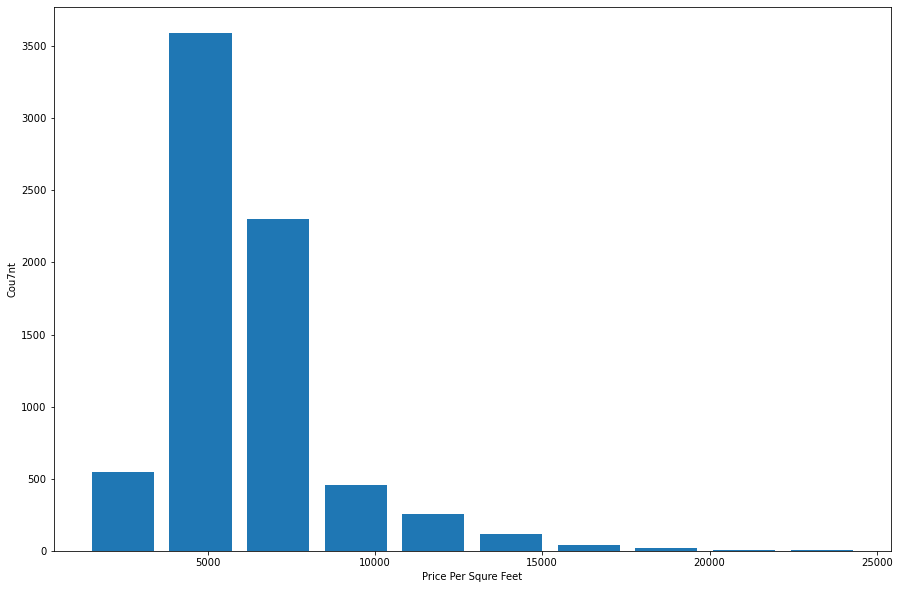

In [78]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Squre Feet")
plt.ylabel("Cou7nt")

In [79]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [80]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [81]:
#it is unusual to have more bathroom than bedroom

Text(0, 0.5, 'count')

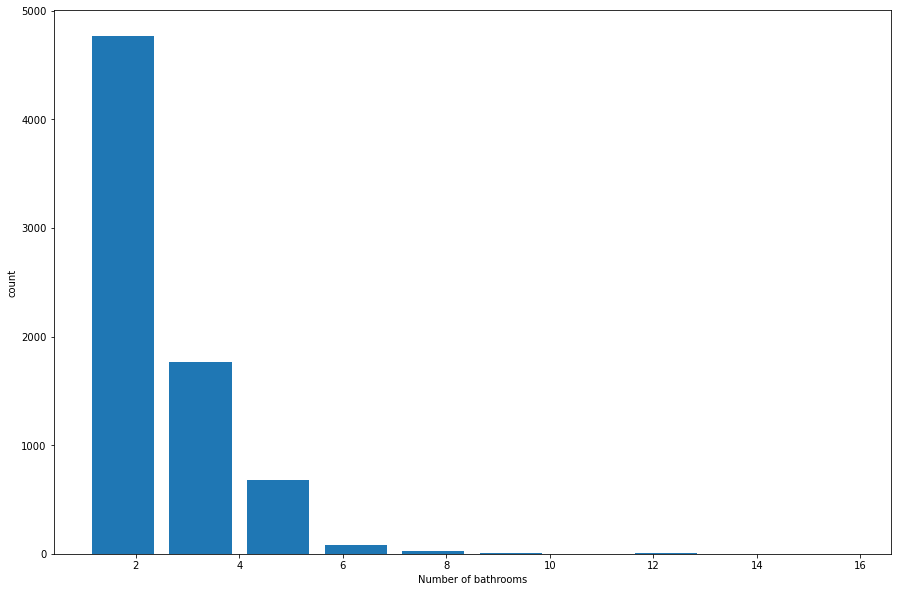

In [82]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [83]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [84]:
 #this are all outlair bathrooms are more than bedrooms

In [85]:
df9 = df8[df8.bath<df8.bhk+2]

In [86]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [87]:
df9.shape

(7251, 7)

In [93]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [94]:
dummies = pd.get_dummies(df10.location) #encoding one hot
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')
df11.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df12 = df11.drop('location',axis='columns')
df12.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df12.shape

(7251, 245)

In [99]:
x = df12.drop('price', axis='columns') # independent variable
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y = df12.price # dependent variable
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=10)

In [102]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874312

In [103]:
# k fold cross validation to get best datamodel and score using shufflesplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score



In [104]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #randomise the sample

cross_val_score(LinearRegression(), x,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [112]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' :{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
#         print(algo_name, config)
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
#         print(scores)
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687432,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718292,"{'criterion': 'mse', 'splitter': 'best'}"


In [113]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [136]:
np.where(x.columns=='1st Phase JP Nagar')

(array([4], dtype=int64),)

In [134]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0] #??? AXIS 0 0 row column
     
    x1 = np.zeros(len(x.columns))
    x1[0] = sqft 
    x1[1] = bath
    x1[2] = bhk
    if loc_index >=0:
        x1[loc_index] = 1
    print(loc_index)
    print(x1)
    return lr_clf.predict([x1])[0]#???

predict_price('1st Phase JP Nagar',1000,2,2)

4
[1000.    2.    2.    0.    1.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0. 

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677179237

In [127]:
predict_price('1st Phase JP Nagar',1000,3,2)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5780717163032

In [137]:
import pickle
with open('D:\ML_HousePrice_Project\housing_price.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [138]:
import json
columns = {
    'data_columns' :[col.lower() for col in x.columns]
}
with open("D:\ML_HousePrice_Project\housing_price_columns.json","w") as f:
    f.write(json.dumps(columns))